In [22]:
from keras.datasets import imdb #used to download IMDB dataset of 80MB

In [23]:
(train_data,train_labels) ,( test_data,test_labels ) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do

##### HERE 0 means negative and 1 means positive in labels

In [24]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [25]:
train_labels[1]

0

In [26]:
max_ind = max([max(sequence) for sequence in train_data])
print(max_ind)# the largest index will be 9999

9999


In [46]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)


In [47]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [48]:
#Now lets build the model 

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [49]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [50]:
#setting aside validation data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [52]:
history = model.fit( partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0070 - accuracy: 0.9989 - val_loss: 0.7343 - val_accuracy: 0.8664
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.7876 - val_accuracy: 0.8573
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.8172 - val_accuracy: 0.8646
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0018 - accuracy: 0.9999 - val_loss: 0.8406 - val_accuracy: 0.8620
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.8834 - val_accuracy: 0.8624
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.9121 - val_accuracy: 0.8632
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 1.0175 - val_accuracy: 0.8613
Epoch 8/20
30

In [53]:
history_dict = history.history

In [54]:
print(history_dict)

{'loss': [0.006966683082282543, 0.0032108724117279053, 0.004899727180600166, 0.0018044370226562023, 0.0038859895430505276, 0.0010431003756821156, 0.0016694569494575262, 0.000748845748603344, 0.0005922094569541514, 0.0010079899802803993, 0.000383127189707011, 0.0015873501542955637, 0.00017871239106170833, 0.00014898455992806703, 0.0017170874634757638, 0.00010344447218813002, 7.528436253778636e-05, 6.225748074939474e-05, 0.0008465450373478234, 3.767249654629268e-05], 'accuracy': [0.9988666772842407, 0.9998666644096375, 0.9994000196456909, 0.9998666644096375, 0.9993333220481873, 1.0, 0.9998666644096375, 1.0, 1.0, 0.9998666644096375, 1.0, 0.9997333288192749, 1.0, 1.0, 0.9993333220481873, 1.0, 1.0, 1.0, 0.9998000264167786, 1.0], 'val_loss': [0.7343494892120361, 0.7876240015029907, 0.8172122240066528, 0.8406457901000977, 0.8833719491958618, 0.9120758771896362, 1.0175226926803589, 0.9774659872055054, 1.1667444705963135, 1.0450845956802368, 1.0992740392684937, 1.1412726640701294, 1.15698719024

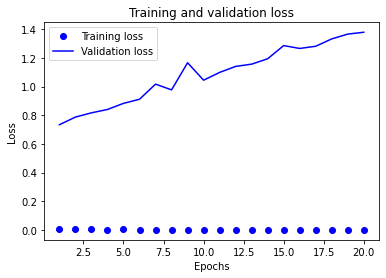

In [67]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

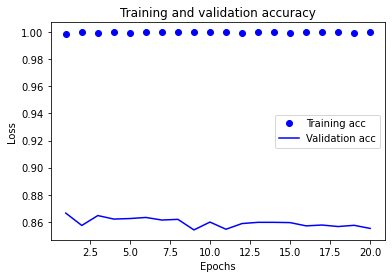

In [69]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [70]:
model.predict(x_test)

array([[5.92134602e-05],
       [1.00000000e+00],
       [9.99548078e-01],
       ...,
       [1.51793965e-05],
       [1.31824613e-03],
       [7.34457374e-01]], dtype=float32)